# Data exploration for movie summaries dataset
Let's try to find nice features to get some creative ideas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df_movies = pd.read_csv('../../data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None)
# Add column names accordingly to the readme
df_movies.columns = ["wikipedia_ID", "freebase_ID", "film", "release_date", "box_office_revenue", "runtime", "languages", "countries", "genres"]
df_movies


,wikipedia_ID,freebase_ID,film,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [3]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')
years = df_movies['release_date'].dt.year
first_year = years.min()
last_year = years.max()

print(first_year, last_year)

#I currently drop every sample that doesnt have a box office revenue, might do smth more intelligent later
df_movies = df_movies.dropna(subset=['box_office_revenue'])

df_movies

1892.0 2016.0


,wikipedia_ID,freebase_ID,film,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa..."
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""..."
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
...,...,...,...,...,...,...,...,...,...
81695,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""..."
81720,7761830,/m/0kvgqb,Spaced Invaders,NaT,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie..."
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana..."
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."


In [ ]:
df_char = pd.read_csv('../../data/MovieSummaries/character.metadata.tsv', sep='\t', header=None)

df_char.columns = ["wikipedia_ID", "freebase_ID", "release_date", "in_movie_name", "date_of_birth", "gender", "height", "ethnicity", "name", "age_at_release", "char_actor_map_ID", "char_ID", "actor_ID"]
df_char.drop(columns=['in_movie_name'], inplace=True)
df_char

,wikipedia_ID,freebase_ID,release_date,date_of_birth,gender,height,ethnicity,name,age_at_release,char_actor_map_ID,char_ID,actor_ID
0,975900,/m/03vyhn,2001-08-24,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


In [5]:

df_actor_movie = pd.merge(df_char, df_movies, on="freebase_ID", how='inner')
df_actor_movie.drop(columns=['release_date_y'], inplace=True)
df_actor_movie['release_date_x'] = pd.to_datetime(df_actor_movie['release_date_x'], errors='coerce')

#keep revenue per actor every year to estimate the actor's popularity at the oscar year
actor_revenue_year = {}

#cumulative sum for each year to measure popularity at the given year
for year in range(int(first_year), int(last_year)+1, 1):
    df_actor_movie_year = df_actor_movie[df_actor_movie['release_date_x'].dt.year <= year]
    actor_revenue = df_actor_movie_year.groupby(['name'])['box_office_revenue'].mean()
    actor_revenue_year[year] = actor_revenue


In [6]:
actor_revenue_year[1999]

name
'Squeeks' the Caterpillar    6.345699e+07
A. J. Cook                   1.040938e+07
A. J. Langer                 2.599358e+07
A. Michael Baldwin           1.198847e+07
Aaron Eckhart                3.593273e+07
                                 ...     
Ángela Molina                4.452429e+06
Éric Cantona                 8.215064e+07
Éva Igó                      4.956401e+06
Óscar Cardozo Ocampo         1.687311e+06
Željko Ivanek                4.851627e+07
Name: box_office_revenue, Length: 16777, dtype: float64

### Oscar dataset

In [ ]:
df_oscar = pd.read_csv('../../data/the_oscar_award.csv')

min_year_oscar = df_oscar['year_film'].min()
max_year_oscar = df_oscar['year_film'].max()
#contains more years than the CMU dataset
df_oscar = df_oscar.dropna(subset=['film'])


### How often do the most popular actor/actress win ?

In [8]:
#only keeps actor and directors
df_oscar_actor = df_oscar[(df_oscar['category'] == 'ACTOR') | (df_oscar['category'] == 'ACTRESS') | (df_oscar['category'] == 'DIRECTING (Comedy Picture)')  | (df_oscar['category'] == 'DIRECTING (Dramatic Picture)')]




In [9]:
actor_oscar_year = {}

for year in range(int(first_year), int(last_year)+1, 1):
    df_oscar_year = df_oscar_actor[df_oscar_actor['year_ceremony'] == year]
    actor_oscar_year[year] = pd.merge(actor_revenue_year[year], df_oscar_year, on='name', how='inner')

#1 true in actor and one true in actress each year
actor_oscar_year[1948]

,name,box_office_revenue,year_film,year_ceremony,ceremony,category,film,winner
0,Gregory Peck,7.000000e+06,1947,1948,20,ACTOR,Gentleman's Agreement,False
1,Joan Crawford,1.792333e+06,1947,1948,20,ACTRESS,Possessed,False
2,Loretta Young,6.831310e+05,1947,1948,20,ACTRESS,The Farmer's Daughter,True
3,Michael Redgrave,2.492170e+05,1947,1948,20,ACTOR,Mourning Becomes Electra,False
4,Ronald Colman,2.880500e+06,1947,1948,20,ACTOR,A Double Life,True
5,Rosalind Russell,1.352500e+06,1947,1948,20,ACTRESS,Mourning Becomes Electra,False
6,Susan Hayward,3.778654e+06,1947,1948,20,ACTRESS,Smash-Up--The Story of a Woman,False
7,William Powell,2.215750e+06,1947,1948,20,ACTOR,Life with Father,False


In [ ]:
#lets check if each year, the actor/actress with the highest mean box office revenue wins the oscar:

count_nz = 0
count_actor = 0
count_actress = 0

#only loop on years in common
for year in range(int(first_year), int(last_year)+1, 1):
    df = actor_oscar_year[year]
    df_actor = df[df['category'] == 'ACTOR']
    df_actress = df[df['category'] == 'ACTRESS']



    if len(df_actor) and len(df_actress):
        count_nz += 1

        max_score_actor = df_actor['box_office_revenue'].max()
        max_score_actress = df_actress['box_office_revenue'].max()

        pop_actor_won = df_actor[df_actor['box_office_revenue'] == max_score_actor]['winner'].values
        pop_actress_won = df_actress[df_actress['box_office_revenue'] == max_score_actress]['winner'].values

        if pop_actor_won[0]:
            #print(f'the most popular actor won in {year}')
            count_actor +=1

        if pop_actress_won[0]:
            #print(f'the most popular actress won in {year}')
            count_actress +=1

print(f'Number of years evaluated: {count_nz}')
print(f'the most popular actor won in {100*count_actor/count_nz}% of oscar ceremonies')
print(f'the most popular actress won in {100*count_actress/count_nz}% of oscar ceremonies')


Number of years evaluated: 47
the most popular actor won in 0.2978723404255319% of oscar ceremonies
the most popular actress won in 0.3617021276595745% of oscar ceremonies


### Remarks:

* Unfortunately, very few samples at the moment

* We could define a better popularity score: example a weighted average that gives less importance to old revenues as people could forget about the actor or a bonus factor to an actor if he is popular during several consecutive years as he would familiarize an audience. Additionally, there could be more meaningful measures of the popularity of an actor than the box office revenue of the movies he played in. In fact, he could play a role that nobody would remember in a really popular movie. However, data partially come from years that `pytrends` do not cover as they were too long ago.

* CMU does not provide data on directors: drop this part of find a new dataset/webscrapping?

# Is there a difference in box office distribution between winning and non-winning movies?

winner-loser ratio: 0.35135135135135137
mean and std of winners: 62336584.23076923, 27947120.826992445
mean and std of losers: 63682512.75675676, 45843152.30969602


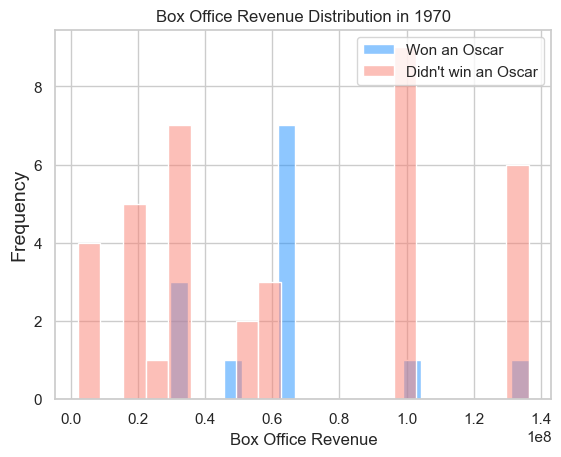

In [11]:
#distributions vary each year
selected_year = 1970

df_oscar_year = df_oscar[df_oscar['year_film'] == selected_year]

df_movie_oscar_year = pd.merge(df_oscar_year, df_movies, on='film', how='inner')

won_revenue = df_movie_oscar_year[df_movie_oscar_year['winner']]['box_office_revenue'].values
loser_revenue = df_movie_oscar_year[~df_movie_oscar_year['winner']]['box_office_revenue'].values

print(f'winner-loser ratio: {len(won_revenue)/len(loser_revenue)}')
print(f'mean and std of winners: {np.mean(won_revenue)}, {np.std(won_revenue)}')
print(f'mean and std of losers: {np.mean(loser_revenue)}, {np.std(loser_revenue)}')

"""
plt.title(f'Box office revenue distribution in {selected_year}')
plt.hist(won_revenue, alpha=0.5, label='won an oscar')
plt.hist(loser_revenue, alpha=0.5, label='didnt win an oscar')
plt.legend(loc='upper right')
plt.show()
"""

sns.set(style="whitegrid")

sns.histplot(won_revenue, bins=20, color='dodgerblue', label='Won an Oscar', alpha=0.5)
sns.histplot(loser_revenue, bins=20, color='salmon', label="Didn't win an Oscar", alpha=0.5)
plt.title(f'Box Office Revenue Distribution in {selected_year}')
plt.xlabel('Box Office Revenue')
plt.ylabel('Frequency', fontsize=14)
plt.legend(loc='upper right')

# Show the plot
plt.show()





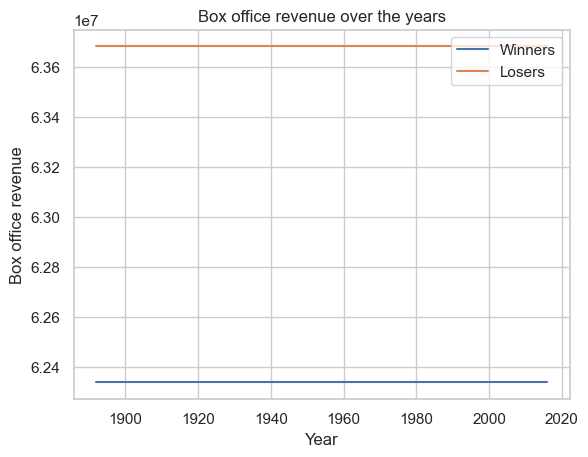

In [20]:
years = range(int(first_year), int(last_year)+1, 1)
mean_revenue_win = []
mean_revenue_lose = []



for year in years:

    df_oscar_year = df_oscar[df_oscar['year_film'] == selected_year]
    df_movie_oscar_year = pd.merge(df_oscar_year, df_movies, on='film', how='inner')

    won_revenue = df_movie_oscar_year[df_movie_oscar_year['winner']]['box_office_revenue'].mean()
    loser_revenue = df_movie_oscar_year[~df_movie_oscar_year['winner']]['box_office_revenue'].mean()

    mean_revenue_win.append(won_revenue)
    mean_revenue_lose.append(loser_revenue)


plt.plot(years, mean_revenue_win, label='Winners')
plt.plot(years, mean_revenue_lose, label='Losers')


plt.title('Box office revenue over the years')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Box office revenue')
plt.show()
